In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

'C:\\Users\\regis\\OneDrive\\Dokumente\\GitHub\\wake_effect\\delta_wind_velocity'

In [2]:
# load data - two data frames
# merge two dataframes
wind_dir = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Wind_direction.csv')
wind_v = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Windfarm.csv')
df = wind_dir.merge(wind_v, left_on='Unnamed: 0', right_on='Unnamed: 0')

,Unnamed: 0,10.0,40.0,60.0,80.0,100.0
0,2013-08-01 00:00:00,NaN,NaN,129.7,110.8,113.0
1,2013-08-01 00:10:00,NaN,NaN,111.9,113.0,115.5
2,2013-08-01 00:20:00,NaN,NaN,116.3,110.2,112.2
3,2013-08-01 00:30:00,NaN,NaN,115.2,112.6,115.9


In [129]:
# Wind Direction Analysis

# Drop columns with inconsistent wind_dir records
# Get mean wind direction per angle, between average of 80.0 and 100.0. Group wind_dir by steps of 10.
# Rename numerical titles
df1 = df.drop(columns = ['10.0'])
df1 = df1.drop(columns = ['40.0'])
df1 = df1.drop(columns = ['60.0'])
df1['wind_dir'] = ((df1['80.0'] + df1['100.0'])/2).round(0)
df1['80.0'] = df1['80.0'].round(0)
df1['100.0'] = df1['100.0'].round(0)
df1 = df1.rename(columns={'80.0': 'eighty', '100.0': 'hundred'})
df1.head(4)

,Unnamed: 0,eighty,hundred,WTG1,WTG2,WTG3,WTG4,WTG5,WTG6,WTG7,...,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32,wind_dir
0,2013-08-01 00:00:00,111.0,113.0,11.3,12.4,10.4,9.8,9.9,10.5,11.4,...,12.5,12.2,12.6,12.5,12.8,13.8,12.9,12.4,8.9,112.0
1,2013-08-01 00:10:00,113.0,116.0,11.6,11.9,10.4,10.7,10.6,10.7,12.0,...,13.0,12.5,14.4,12.4,12.8,13.4,13.1,13.2,9.8,114.0
2,2013-08-01 00:20:00,110.0,112.0,11.8,12.5,10.8,10.6,10.4,10.5,11.9,...,12.1,11.7,12.2,12.0,12.2,13.2,12.4,12.3,8.7,111.0
3,2013-08-01 00:30:00,113.0,116.0,11.7,11.6,10.6,10.4,10.1,10.3,11.7,...,13.2,10.9,12.4,12.3,12.3,12.4,11.8,10.5,8.6,114.0


In [174]:
# count amount of entries per angle for 80m wind direction
# same for 100m wind direction
df_eighty = pd.DataFrame()
df_eighty['eighty'] = df1['eighty']
df_eighty['count_rows'] = df1.groupby(['eighty'])['eighty'].transform('count')
df_eighty = df_eighty.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

df_hundred = pd.DataFrame()
df_hundred['hundred'] = df1['hundred']
df_hundred['count_rows'] = df1.groupby(['hundred'])['hundred'].transform('count')
df_hundred = df_hundred.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

df_w = pd.DataFrame()
df_w['wind_dir'] = df1['wind_dir']
df_w['count_rows'] = df1.groupby(['wind_dir'])['wind_dir'].transform('count')
df_w = df_w.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

wind_dir_80 = df_eighty['eighty']
amount_80 = df_eighty['count_rows']

wind_dir_100 = df_hundred['hundred']
amount_100 = df_hundred['count_rows']

wind_dir_mean = df_w['wind_dir']
amount_mean = df_w['count_rows']

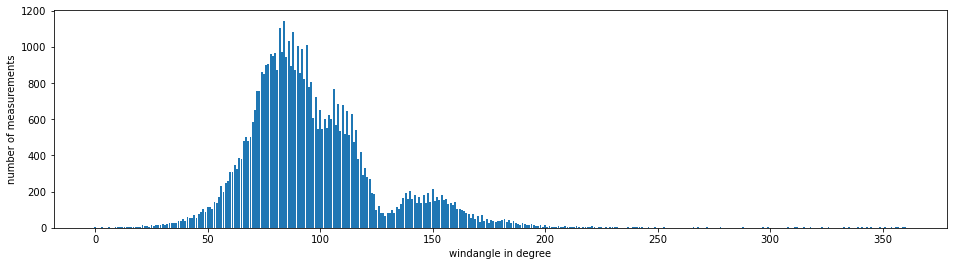

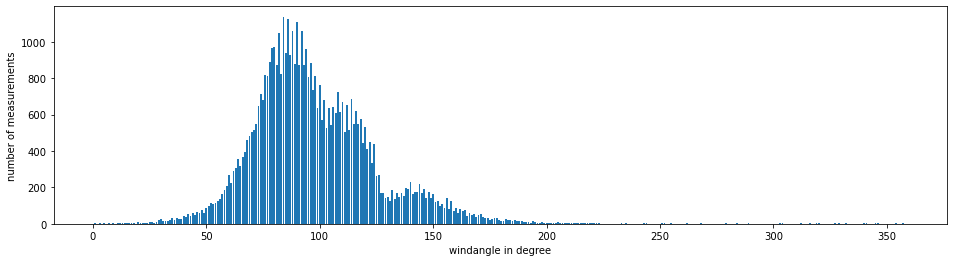

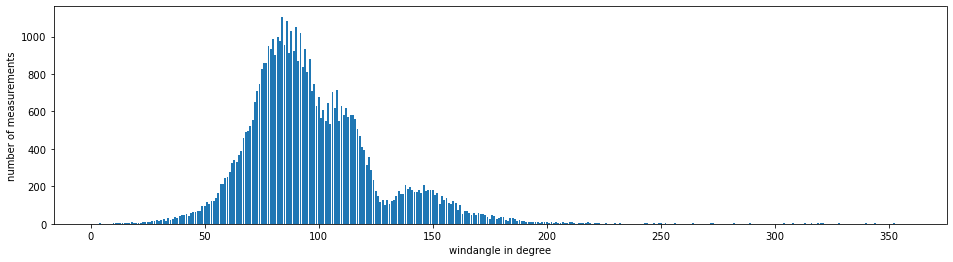

In [175]:
# Creates bar plot of the distribution of entries per angle at 80m
# create bar plot of amount of entries of wind_dir at 100m

fig = plt.figure()
plt.bar(wind_dir_80, amount_80)
fig.set_size_inches(16, 4)
plt.ylabel("number of measurements")
plt.xlabel("windangle in degree")
plt.show()

fig = plt.figure()
plt.bar(wind_dir_100, amount_100)
fig.set_size_inches(16, 4)
plt.ylabel("number of measurements")
plt.xlabel("windangle in degree")
plt.show()

fig = plt.figure()
plt.bar(wind_dir_mean, amount_mean)
fig.set_size_inches(16, 4)
plt.ylabel("number of measurements")
plt.xlabel("windangle in degree")
plt.show()

In [110]:
# Wind Speed Analysis
# Input: turbine nr
# Output: plot of speed per angle

def wind_speed(turbine):
    t = "WTG" + str(turbine)
    wind_dir = df1['wind_dir']
    amount = df1[t]
    fig = plt.figure()
    plt.scatter(wind_dir, amount, color='cornflowerblue', s=0.5, alpha=0.175)
    plt.ylabel("windspeed m/s")
    plt.xlabel("windangle in degree")
    fig.set_size_inches(16, 4)
    plt.show()

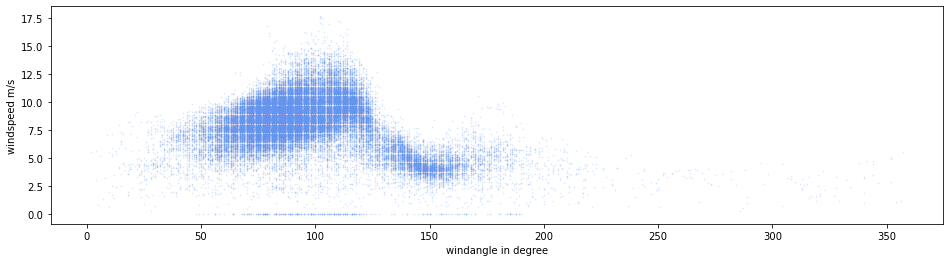

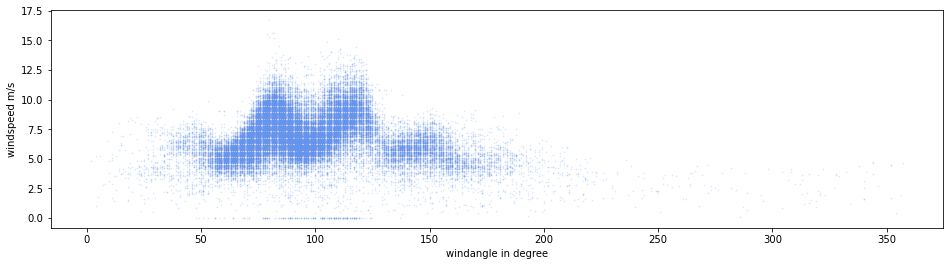

In [170]:
wind_speed(30)
wind_speed(5)